In [1]:
import alphastats 
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl") # remove warning from mac
import matplotlib.pyplot as plt

In [2]:
path = 'D:/data/SILAC DIA metabolic pulse labeling/with spike in/'

In [32]:
loader = alphastats.GenericLoader(path + 'protein intensities/nsp_href.csv', 
                                  intensity_column = '[sample]',
                                    index_column="Protein.Group")

In [33]:
ds = alphastats.DataSet(
    loader = loader,
    metadata_path = path + 'metadata/metadata_spikein.xlsx',
    sample_column = 'Sample')

DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).


In [34]:
print(f"Number of samples in the matrix: {ds.mat.shape[0]}, number of samples in metadata: {ds.metadata.shape[0]}.")

Number of samples in the matrix: 15, number of samples in metadata: 12.


In [35]:
ds.metadata

,Run,Sample,Condition,Rep
0,Popeye_20230710_HStdia_RJK_CH_1_B1_1_4258,C_1,C,1
1,Popeye_20230710_HStdia_RJK_CH_2_B2_1_4259,C_2,C,2
2,Popeye_20230710_HStdia_RJK_DH_1_B7_1_4264,D_1,D,1
3,Popeye_20230710_HStdia_RJK_DH_2_B8_1_4265,D_2,D,2
4,Popeye_20230710_HStdia_RJK_DLH_1_B11_1_4268,DL_1,DL,1
5,Popeye_20230710_HStdia_RJK_DLH_2_B12_1_4269,DL_2,DL,2
6,Popeye_20230710_HStdia_RJK_FH_1_B5_1_4262,F_1,F,1
7,Popeye_20230710_HStdia_RJK_FH_1_B6_1_4263,F_2,F,2
8,Popeye_20230710_HStdia_RJK_FLH_1_B9_1_4266,FL_1,FL,1
9,Popeye_20230710_HStdia_RJK_FLH_2_B10_1_4267,FL_2,FL,2


In [36]:
ds.mat

Protein.Group,A0A0B4J2D5;P0DPI2,A0A3B3IU46,A0AV96,A0AVT1,A0FGR8,A0MZ66,A0PJW6,A1A4S6,A1L0T0,A2RRP1,...,Q9Y6M5,Q9Y6M9,Q9Y6N5,Q9Y6P5,Q9Y6V7,Q9Y6W3,Q9Y6W5,Q9Y6X5,Q9Y6X9,Q9Y6Y8
Unnamed: 0.1,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,4297.0,4298.0,4299.0,4300.0,4301.0,4302.0,4303.0,4304.0,4305.0,4306.0
Unnamed: 0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,4297.0,4298.0,4299.0,4300.0,4301.0,4302.0,4303.0,4304.0,4305.0,4306.0
C_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DL_1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DL_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ds.preprocess(subset=True)

Data has been log2-transformed.


In [38]:
ds.plot_sampledistribution(color='Condition').show()

In [24]:
ds.plot_pca(group = 'Condition')

Calculating Students t-test...


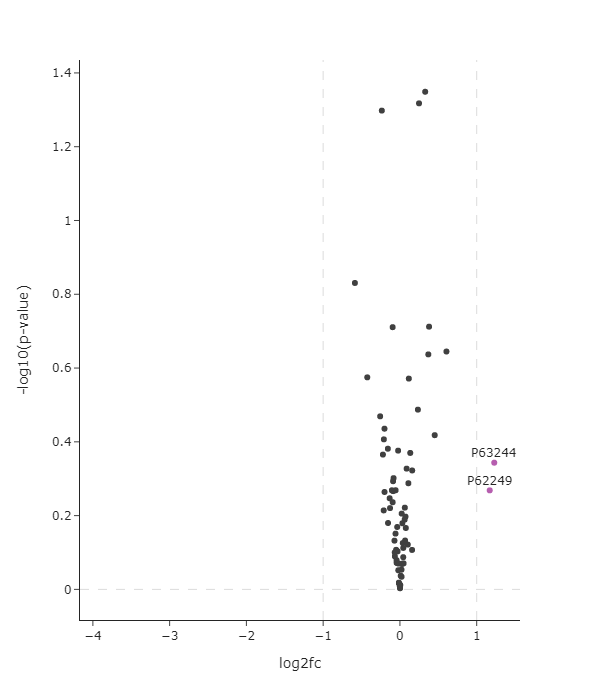

In [44]:
volcano_plot = ds.plot_volcano(
    column="Sample", # column in metadata
    group1=["C_1", "C_2"],
    group2=["F_1", "F_2"],
    labels=True, # add label to significantly enriched proteins
    alpha=1 # cutoff for pvalue
)
volcano_plot.show(renderer = "png")